# Importing important libraries


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload Data

In [139]:
df=pd.read_csv("googleplaystore.csv")

In [36]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Data Cleaning

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          10829 non-null  float64       
 3   Reviews         10829 non-null  object        
 4   Size            10829 non-null  object        
 5   Installs        10829 non-null  int32         
 6   Type            10829 non-null  object        
 7   Price           10829 non-null  object        
 8   Content Rating  10829 non-null  object        
 9   Genres          10829 non-null  object        
 10  Last Updated    10829 non-null  datetime64[ns]
 11  Current Ver     10829 non-null  object        
 12  Android Ver     10829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(10)
memory usage: 1.1+ MB


In [147]:

df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors='coerce')


In [148]:
df.dropna(inplace=True)

In [149]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [150]:
df["Rating"]=df["Rating"].fillna(df["Rating"].mean())

In [151]:
df["Installs"]=df["Installs"].str.replace("+" , "")
df["Installs"]=df["Installs"].str.replace("," , "")
df["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: object

In [40]:
df["Installs"]=df["Installs"].astype(int)

df.dropna(inplace=True)

# Note: All the data is clean now.

# EDA (Data Visualization)

# Category

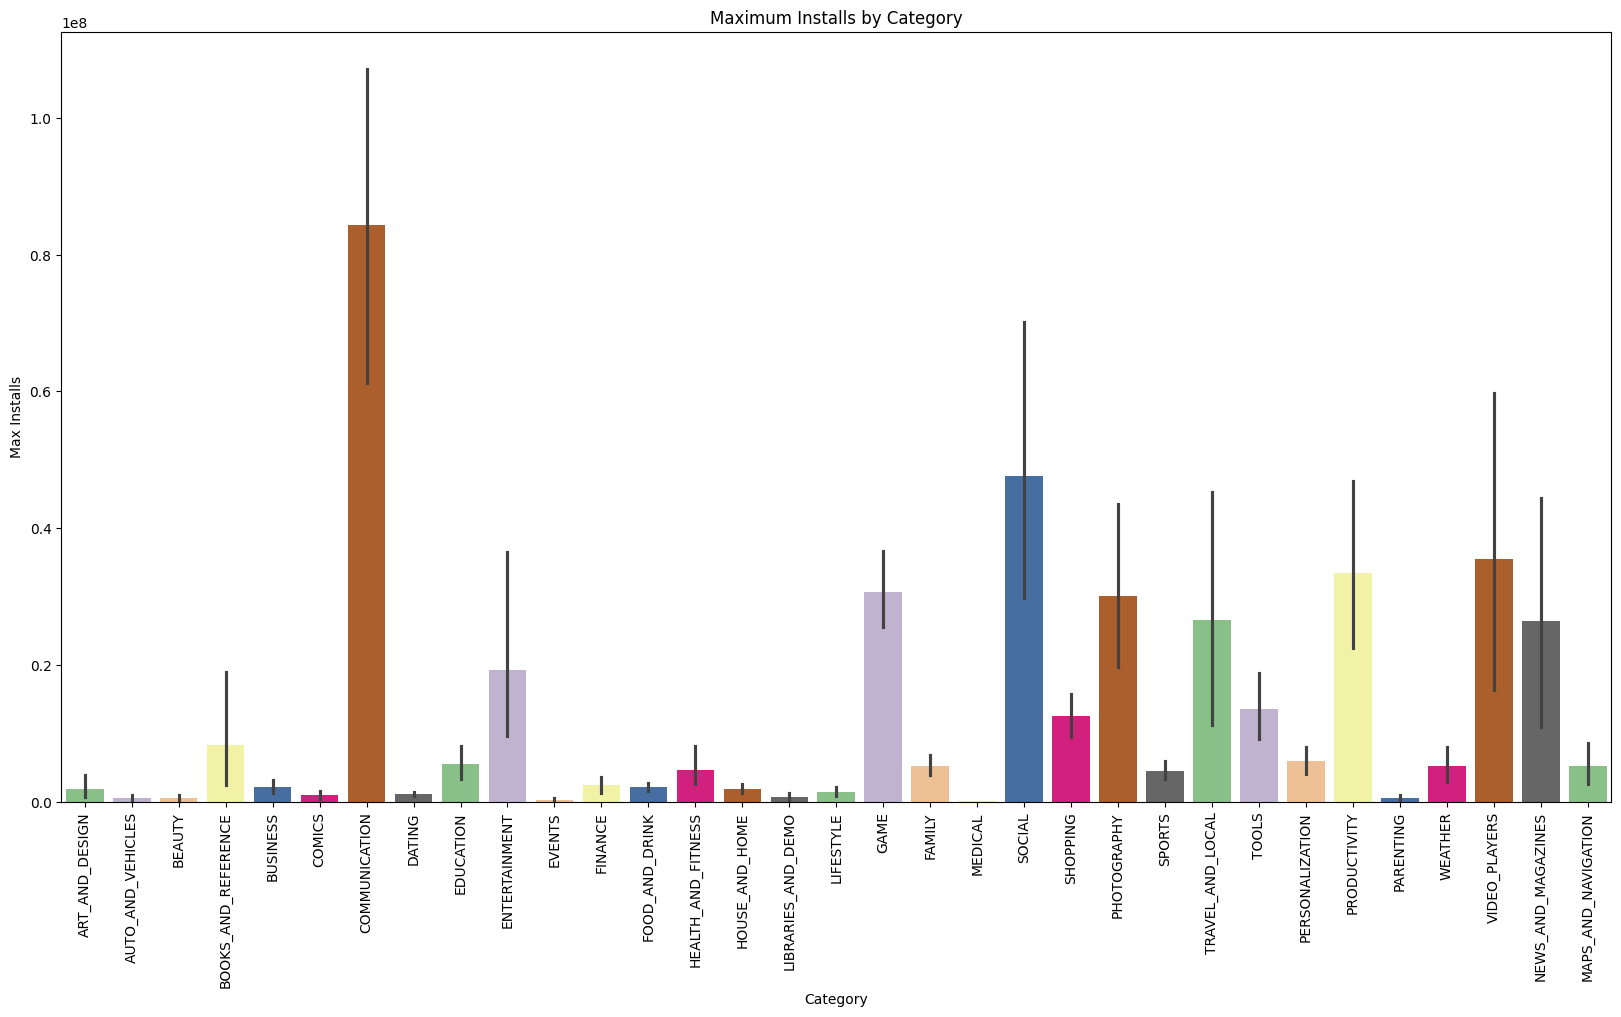

In [82]:
plt.figure(figsize=(20,10))
# Create the bar plot
ax=sns.barplot(x="Category", y="Installs", data=df , hue="Category" , palette="Accent")

# Set plot labels and title
plt.xlabel("Category")
plt.ylabel("Max Installs")
plt.title("Maximum Installs by Category")
plt.xticks(rotation=90)

plt.show()

# Note: From the graph above, it is clear that most app downloads or installs are for communication and social apps.

In [121]:
# Sort the DataFrame by 'Installs' and get the top 15 apps
top_15_apps = df.sort_values(by='Installs', ascending=False).head(15)


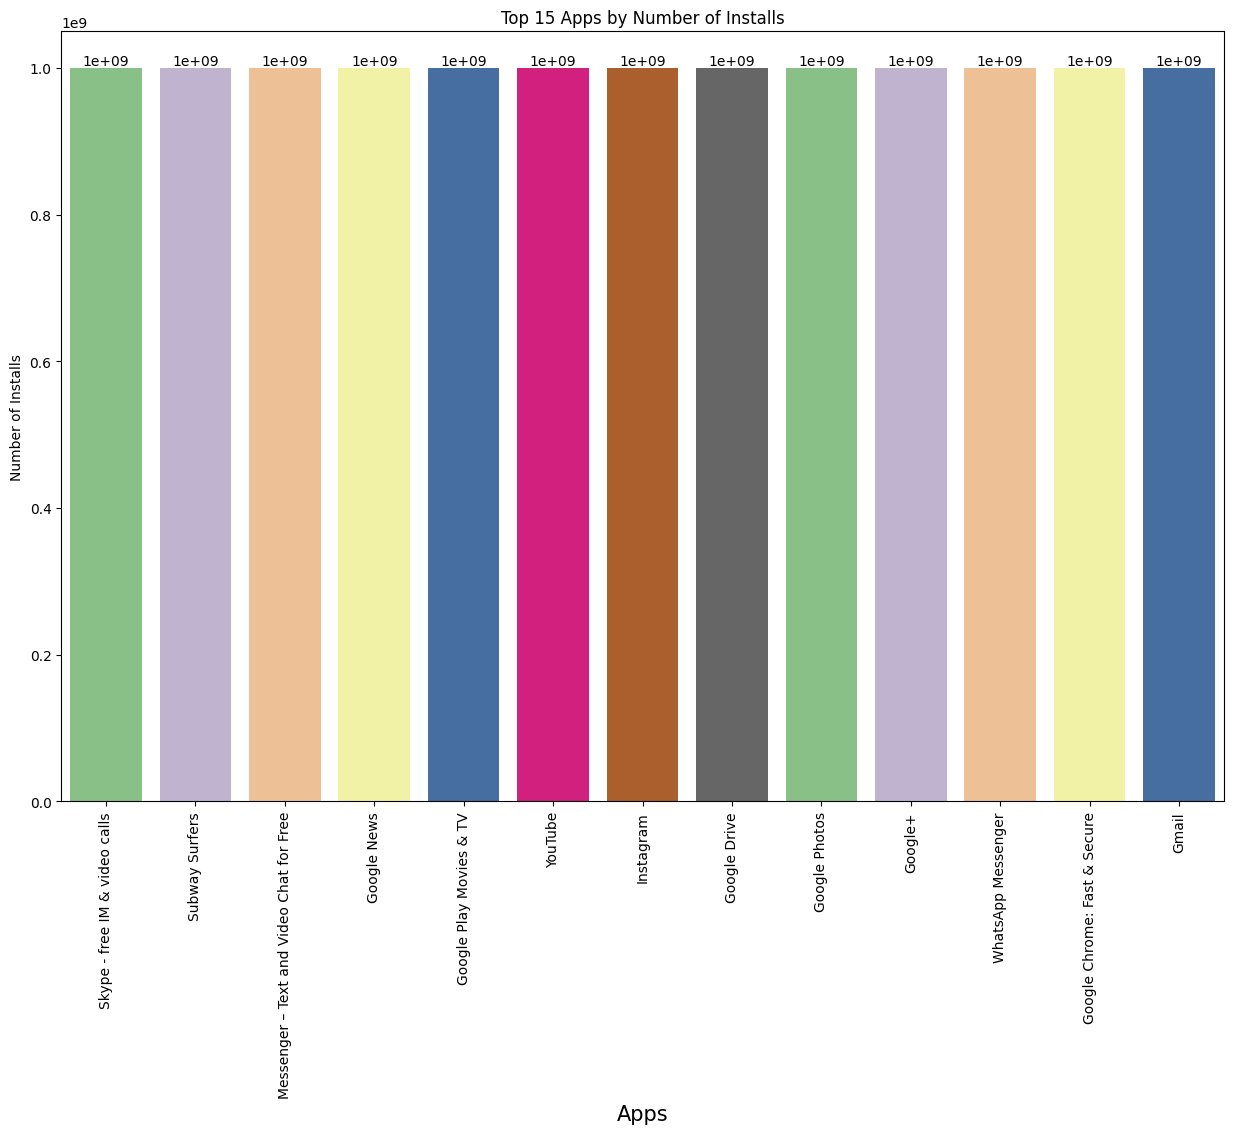

In [97]:

# Create a figure with a specified size
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(x="App", y="Installs", data=top_15_apps, palette="Accent" , hue="App")

# Set plot labels and title
plt.xlabel("Apps" , fontsize=15)
plt.ylabel("Number of Installs")
plt.title("Top 15 Apps by Number of Installs")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars)
# Show the plot
plt.show()

# Note: All the install numbers are over 1,000,000,000 in the dataset. Therefore, the above graph shows the top 15 apps with respect to the number of installs.

In [112]:
gen_grp = df.groupby("Type")["Installs"].sum()

gen_grp

Type
Free    167558951306
Paid        72905071
Name: Installs, dtype: int64

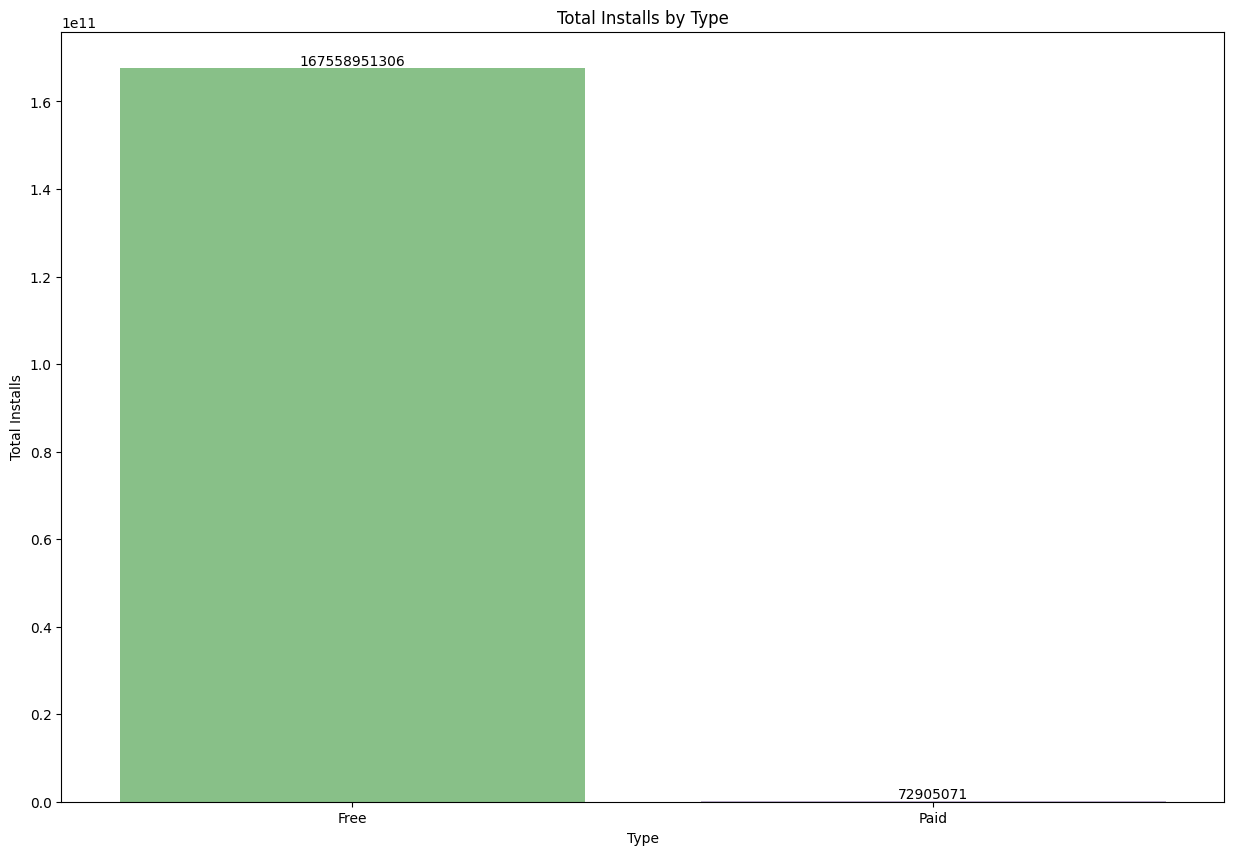

In [116]:
# Convert the Series to a DataFrame
plot_data = gen_grp.reset_index()
plot_data.columns = ['Type', 'Installs']

# Create a figure with a specified size
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(x="Type", y="Installs", data=plot_data, palette="Accent" , hue="Type")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # Use fmt to format the labels

# Set plot labels and title
plt.xlabel("Type")
plt.ylabel("Total Installs")
plt.title("Total Installs by Type")

# Show the plot
plt.show()

# Note: It shows that  paid apps have fewer installs compared to free apps.



In [118]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

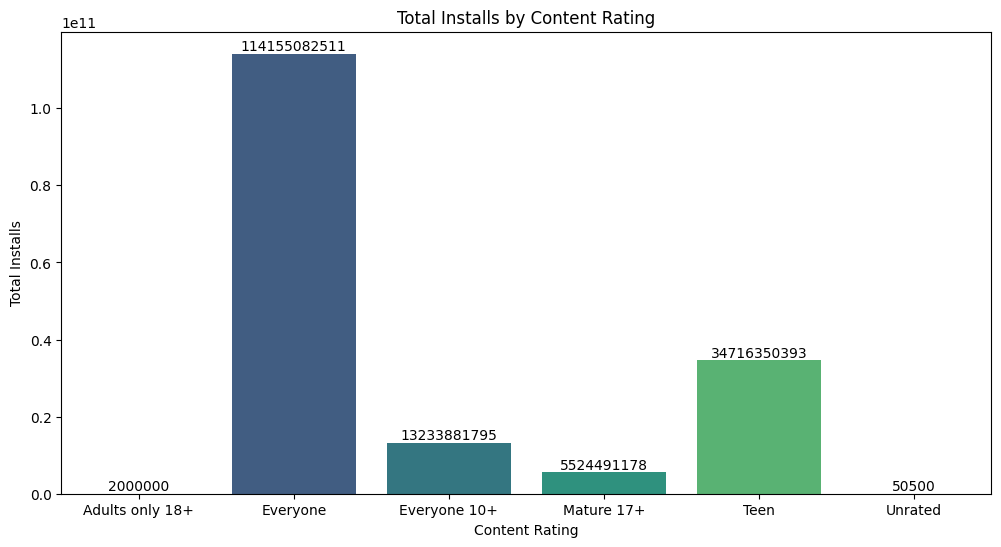

In [120]:

# Group by 'Content Rating' and calculate the sum of 'Installs'
content_rating_grp = df.groupby("Content Rating")["Installs"].sum().reset_index()

# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x="Content Rating", y="Installs", data=content_rating_grp, palette="viridis" , hue="Content Rating")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # Format labels to show no decimal places

# Set plot labels and title
plt.xlabel("Content Rating")
plt.ylabel("Total Installs")
plt.title("Total Installs by Content Rating")

# Show the plot
plt.show()


# Note:  Note Above show Apps which Content for everyone has the most installs

# Conclusion: 
# Free apps that address daily needs, such as communication tools, typically see higher install rates due to their universal appeal and cost-free nature. Their essential functions integrate seamlessly into daily life, and network effects further enhance their popularity.